In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
data_path = 'only_daily.csv'
data = pd.read_csv(data_path)

# 데이터 기본 정보 확인
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2918 non-null   object 
 1   forward_stage  2918 non-null   object 
 2   WTI            2918 non-null   float64
 3   USDKRW         2918 non-null   float64
 4   VIX            2918 non-null   float64
 5   per            2918 non-null   float64
 6   pbr            2918 non-null   float64
 7   RSI            2918 non-null   float64
 8   MACD           2918 non-null   float64
 9   Stochastic     2918 non-null   float64
 10  ATR            2918 non-null   float64
 11  CCI            2918 non-null   float64
 12  ADX            2918 non-null   float64
 13  WilliamsR      2918 non-null   float64
 14  ROC            2918 non-null   float64
 15  Momentum       2918 non-null   float64
 16  MFI            2918 non-null   float64
dtypes: float64(15), object(2)
memory usage: 387.7+ KB
No

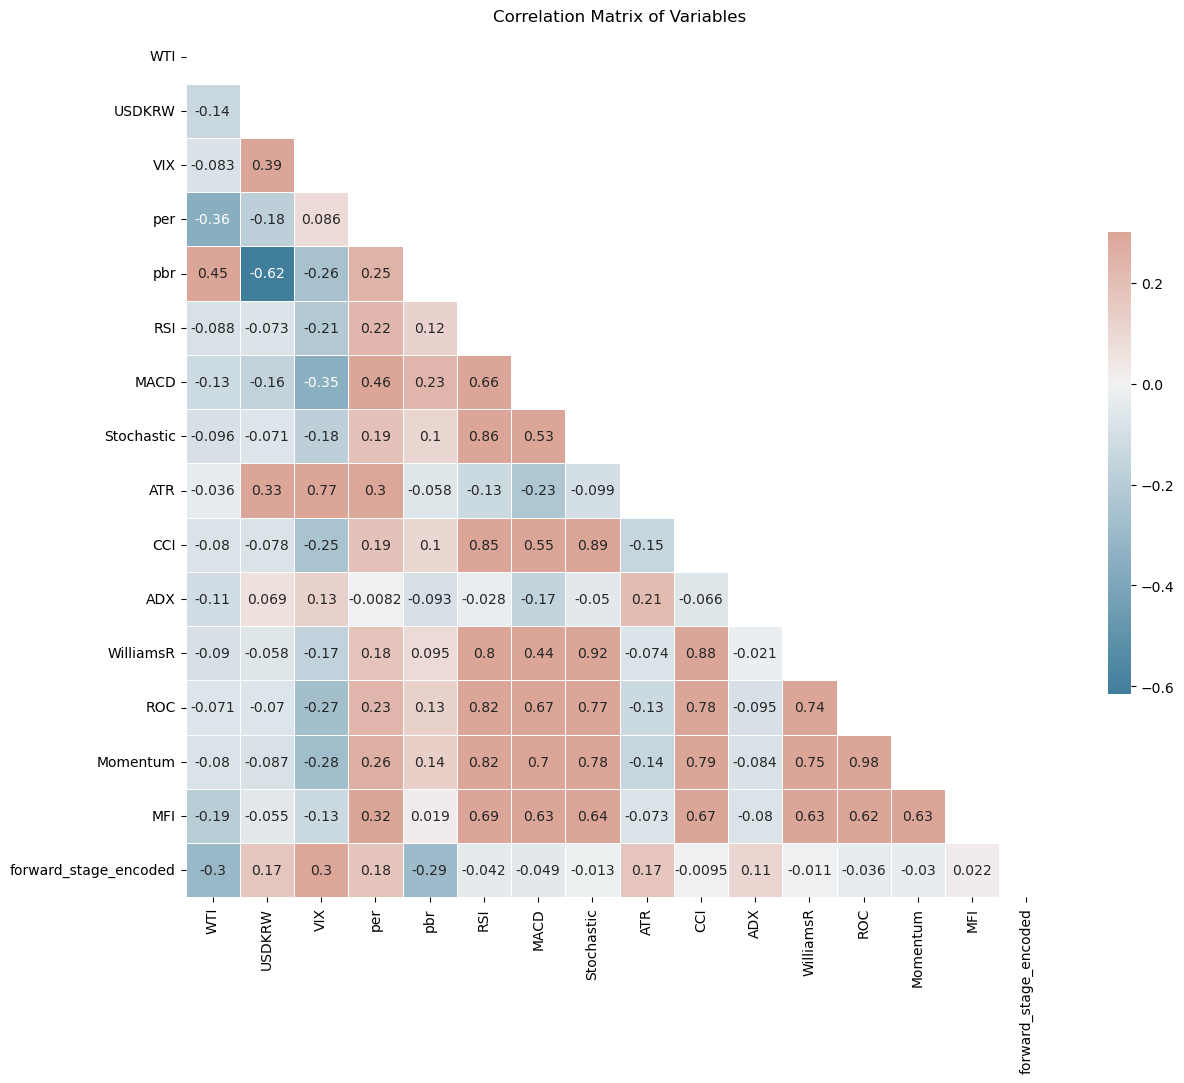

In [6]:
# 상관계수 계산
corr = data.iloc[:, 2:].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# 상관계수 히트맵 시각화
plt.figure(figsize=(14, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # 컬러맵 설정
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Correlation Matrix of Variables")
plt.show()

In [4]:
# 목표 변수 인코딩
le = LabelEncoder()
data['forward_stage_encoded'] = le.fit_transform(data['forward_stage'])

# 데이터 분할
X = data.iloc[:, 2:-1]  # 독립 변수 선택
y = data['forward_stage_encoded']  # 종속 변수 선택
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 데이터 분할

# 랜덤 포레스트 모델 학습
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)
print("Accuracy: ", accuracy)
print("Classification Report: \n", classification_rep)


Accuracy:  0.8886986301369864
Classification Report: 
               precision    recall  f1-score   support

        down       0.91      0.95      0.93       277
     neutral       0.79      0.71      0.74       130
          up       0.92      0.93      0.92       177

    accuracy                           0.89       584
   macro avg       0.87      0.86      0.87       584
weighted avg       0.89      0.89      0.89       584



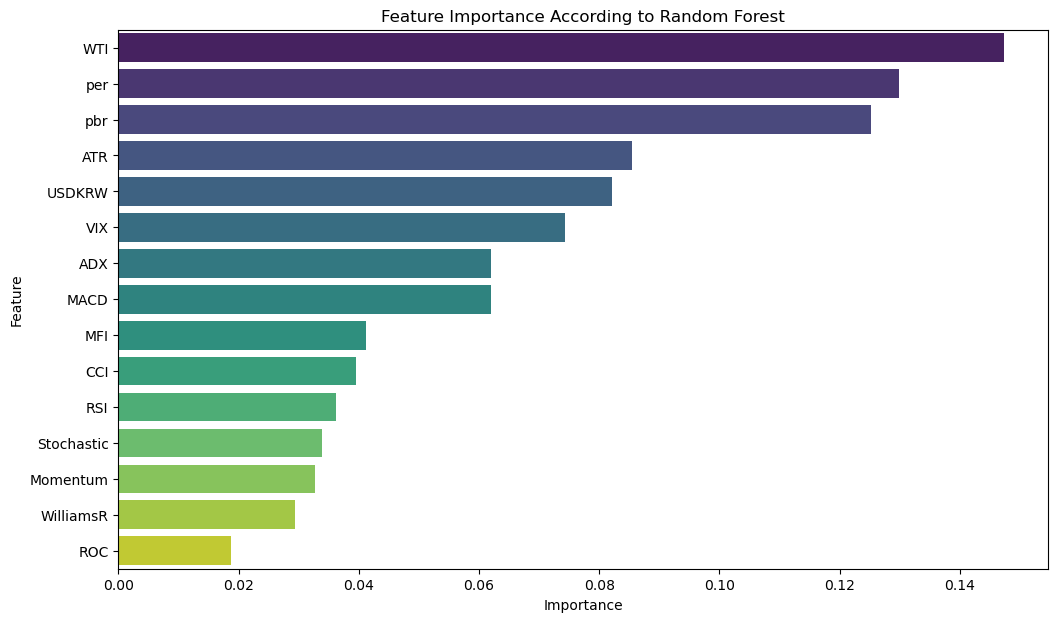

In [5]:
# 피처 중요도 추출
feature_importances = rf_clf.feature_importances_

# 데이터프레임 생성 및 시각화
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importance According to Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
